In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 56.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=57f1083d6ae527214e27b808fe65575cde4ed9cad0e6e50ded3c034e48c41ab1
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

from pyspark.mllib.evaluation import RegressionMetrics

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel

from pyspark.ml.evaluation import RegressionEvaluator

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
spark = SparkSession.builder.master("local[2]").appName("Logistic-Regression-sensor").getOrCreate()

In [ ]:
path = 'sensor.csv'

In [ ]:
df = spark.read.format("csv").option("header","true")\
.option("inferSchema","true").load(path=path)

In [ ]:
df.describe

<bound method DataFrame.describe of DataFrame[_c0: int, timestamp: timestamp, sensor_00: double, sensor_01: double, sensor_02: double, sensor_03: double, sensor_04: double, sensor_05: double, sensor_06: double, sensor_07: double, sensor_08: double, sensor_09: double, sensor_10: double, sensor_11: double, sensor_12: double, sensor_13: double, sensor_14: double, sensor_15: string, sensor_16: double, sensor_17: double, sensor_18: double, sensor_19: double, sensor_20: double, sensor_21: double, sensor_22: double, sensor_23: double, sensor_24: double, sensor_25: double, sensor_26: double, sensor_27: double, sensor_28: double, sensor_29: double, sensor_30: double, sensor_31: double, sensor_32: double, sensor_33: double, sensor_34: double, sensor_35: double, sensor_36: double, sensor_37: double, sensor_38: double, sensor_39: double, sensor_40: double, sensor_41: double, sensor_42: double, sensor_43: double, sensor_44: double, sensor_45: double, sensor_46: double, sensor_47: double, sensor_48:

In [ ]:
df.show()

+---+-------------------+------------------+------------------+------------------+------------------+---------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------+------------------+---------+------------------+-----------------+---------+---------+---------+-----------------+---------+---------+---------+------------------+-----------------+---------+-----------------+---------+---------+---------+---------+---------+------------------+-----------------+---------+---------+---------+------------------+------------------+---------+----------------+------------------+------------------+----------------+---------+-----------------+---------+---------+--------------+
|_c0|          timestamp|         sensor_00|         sensor_01|         sensor_02|         sensor_03|sensor_04|        sensor_05|         sensor_06|         sensor_07|         sens

In [ ]:
df = pd.read_csv("sensor.csv")

# Eksplorasi dan Analisis Data

Menginliasisasi date time dari input rimestamp dan unamed menggunakan drop

In [ ]:
df['datetime'] = pd.to_datetime(df['timestamp'])
df.drop(['timestamp', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,datetime
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:00:00
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:01:00
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-04-01 00:02:00
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-04-01 00:03:00
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-04-01 00:04:00


Visualisasi keadaan Pompa

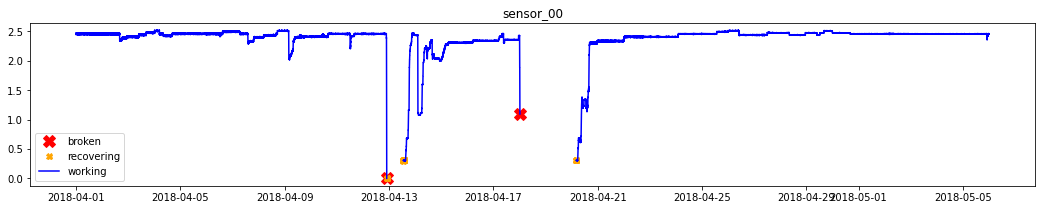

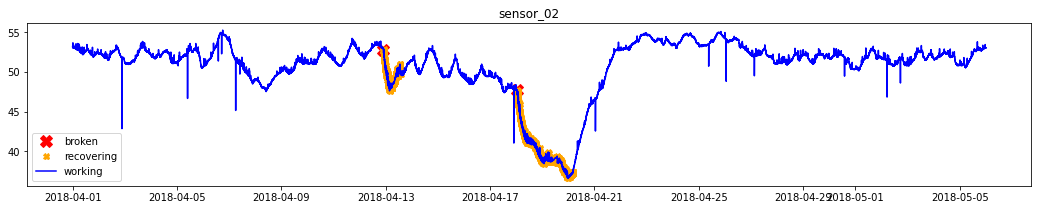

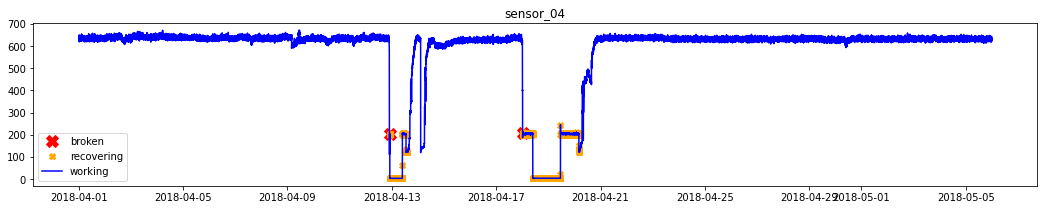

In [ ]:
broken = df[df['machine_status']=='BROKEN']
recovering = df[df['machine_status']=='RECOVERING']

sensors_to_plot = df.columns[0:5:2]

for name in sensors_to_plot:
    plt.figure(figsize=(18,3))
    plt.plot(broken['datetime'], broken[name], linestyle='none', marker='X', color='red', markersize=12, label='broken')
    plt.plot(recovering['datetime'], recovering[name], linestyle='none', marker='X', color='orange', markersize=6, label='recovering')
    plt.plot(df['datetime'], df[name], color='blue', label='working')
    plt.title(name)
    plt.legend()
    plt.show()

# Mengitung Value count untuk machine *status*

In [ ]:
df['machine_status'].value_counts()

NORMAL        46342
RECOVERING     4054
BROKEN            2
Name: machine_status, dtype: int64

# Presentase Data Yang Hilang

In [ ]:
perc_nans = df.isnull().sum().sort_values(ascending=False)/len(df)
perc_nans.head(10)

sensor_15    1.000000
sensor_00    0.079902
sensor_08    0.014088
sensor_06    0.004881
sensor_07    0.004048
sensor_01    0.001270
sensor_31    0.000218
sensor_28    0.000218
sensor_29    0.000218
sensor_30    0.000218
dtype: float64

# membuat kerangka data baru yang disebut df_well dan menghapus semua duplikat dan semua sensor dengan >3% data yang hilang.

In [ ]:
df_well = df.drop_duplicates()
df_well.drop(['sensor_15', 'sensor_50', 'sensor_51', 'sensor_00'], axis=1, inplace=True)

Machine Learning
# K-Means Clustering

mengubah skala data sensor sehingga mereka berada dalam kisaran yang sama dan akan ada pembuatan x_train

In [ ]:
from sklearn.cluster import KMeans
X_train = df_well.drop(['machine_status', 'datetime'], axis=1)
X_train -= X_train.min()
X_train /= X_train.max()
X_train.head()

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49
0,0.739583,0.888889,0.903614,0.943783,0.764598,0.735797,0.758245,0.726412,0.707483,0.489146,...,0.088077,0.066071,0.023756,0.037594,0.066964,0.202985,0.078973,0.061644,0.273060,0.134314
1,0.739583,0.888889,0.903614,0.943783,0.764598,0.735797,0.758245,0.726412,0.707483,0.489146,...,0.088077,0.066071,0.023756,0.037594,0.066964,0.202985,0.078973,0.061644,0.273060,0.134314
2,0.747396,0.888889,0.909639,0.950529,0.735461,0.731029,0.753825,0.728779,0.705442,0.497561,...,0.085929,0.062500,0.023756,0.036910,0.065476,0.201492,0.079961,0.061644,0.268784,0.132353
3,0.739583,0.886574,0.909639,0.934442,0.769891,0.730632,0.763686,0.732499,0.708844,0.506916,...,0.091300,0.062500,0.023014,0.034860,0.063988,0.198507,0.079961,0.061644,0.268784,0.131373
4,0.740885,0.888889,0.909639,0.946897,0.765891,0.732618,0.761986,0.732499,0.708844,0.518868,...,0.100967,0.066071,0.023014,0.036227,0.062500,0.200000,0.081935,0.065068,0.273671,0.130392


Penggunaan Pandas Fill untuk missing value

In [ ]:
X_train.fillna(method='ffill', inplace=True)

# Pengelompokan dengan menggunakan k-means  berdasarkan beberapa parameter

In [ ]:
inertia = []
 
for k in range(1, 15):
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    inertia.append(kmeanModel.inertia_)

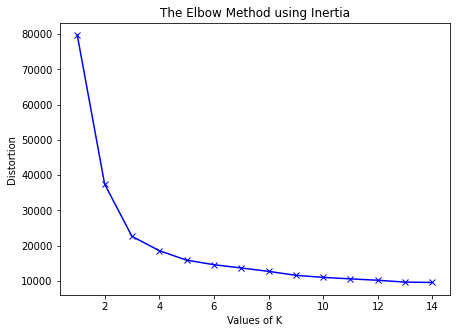

In [ ]:
K = range(1, 15)
plt.figure(figsize=(7,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Inertia')
plt.show()

# Untuk Cluster nya 5 dan random state nya 42

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)

unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))
df_well['cluster'] = labels

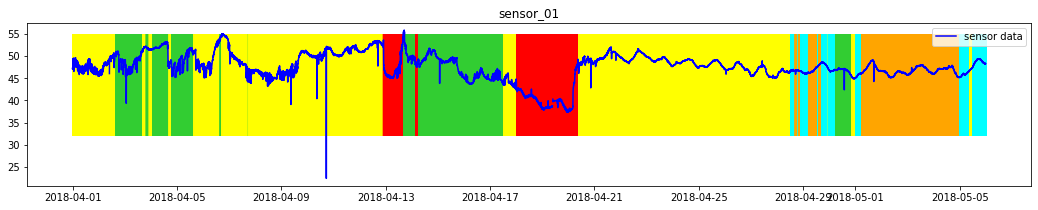

In [ ]:
colors = ['limegreen', 'orange', 'red', 'yellow', 'cyan']
colors_plot = [colors[i] for i in df_well['cluster'].values]
sensors_to_plot = ['sensor_01']
for name in sensors_to_plot:
    plt.figure(figsize=(18,3))
    plt.plot(df_well['datetime'], df_well[name], color='blue', label='sensor data')
    plt.vlines(df_well['datetime'], 32, 55, color=colors_plot, alpha=0.5)
    plt.title(name)
    plt.legend()
    plt.show()

# Sensor yang paling banyak berubah

In [ ]:
centroid_distance = np.abs(kmeans.cluster_centers_[0] - kmeans.cluster_centers_[4])
changed_sensors = np.argsort(centroid_distance)

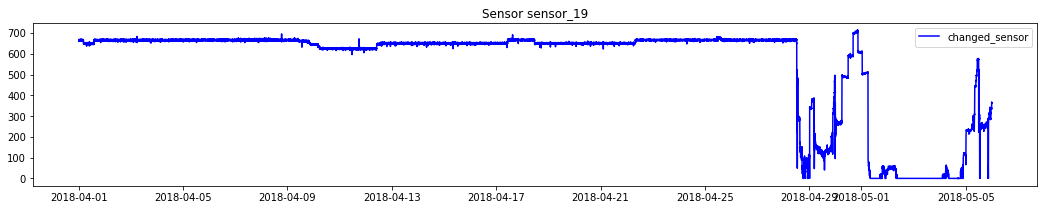

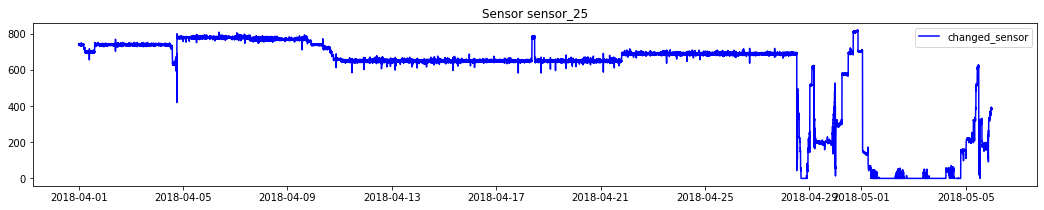

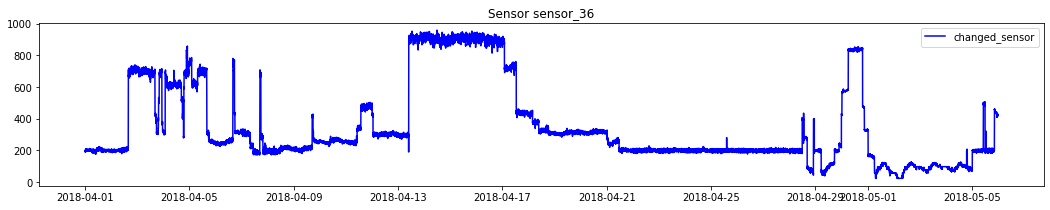

In [ ]:
for sensor_idx in changed_sensors[-3:]:
    sensor_data = df_well.iloc[:, sensor_idx]
    plt.figure(figsize=(18,3))
    plt.plot(df_well['datetime'], sensor_data, color='blue', label='changed_sensor')
    plt.title(f'Sensor {df_well.columns[sensor_idx]}')
    plt.legend()
    plt.show()